In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
quality = pd.read_csv('https://storage.googleapis.com/dimensionless/Analytics/quality.csv')

In [4]:
#quality.dtypes
quality

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.000000,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.000000,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.000000,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.000000,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.000000,10,29,24,51,204,False,0,0
5,6,2,0,9,2,731.000000,6,11,40,53,156,False,4,1
6,7,16,1,8,1,173.958333,4,25,19,40,261,False,0,0
7,8,2,0,8,0,731.000000,5,10,11,28,87,False,0,0
8,9,2,1,4,3,45.000000,5,7,28,20,98,False,0,1
9,10,4,2,0,2,104.000000,2,6,21,17,66,False,0,0


# No. of patients received poor care

In [5]:
pd.DataFrame(quality['PoorCare'].value_counts()).T


,0,1
PoorCare,98,33


In [6]:
pd.DataFrame(quality['PoorCare'].value_counts()).T

,0,1
PoorCare,98,33


# Using sqldf 

In [7]:
from pandasql import sqldf

In [8]:
sqldf("SELECT count(*) from quality where PoorCare = 1 ",locals())


,count(*)
0,33


In [9]:
sqldf("SELECT count(*) from quality where PoorCare = 0 ",locals())

,count(*)
0,98


# Split the data into train and test data set randomly. 
# But if we want same datasets, we should first fix the seed.

In [10]:
qualityTrain, qualityTest = train_test_split(quality, test_size = 0.3,random_state = 88) # random state is the seed here

# Check the structure and confirm

In [11]:
qualityTrain.dtypes

MemberID                  int64
InpatientDays             int64
ERVisits                  int64
OfficeVisits              int64
Narcotics                 int64
DaysSinceLastERVisit    float64
Pain                      int64
TotalVisits               int64
ProviderCount             int64
MedicalClaims             int64
ClaimLines                int64
StartedOnCombination       bool
AcuteDrugGapSmall         int64
PoorCare                  int64
dtype: object

In [12]:
qualityTest.dtypes

MemberID                  int64
InpatientDays             int64
ERVisits                  int64
OfficeVisits              int64
Narcotics                 int64
DaysSinceLastERVisit    float64
Pain                      int64
TotalVisits               int64
ProviderCount             int64
MedicalClaims             int64
ClaimLines                int64
StartedOnCombination       bool
AcuteDrugGapSmall         int64
PoorCare                  int64
dtype: object

# verification of split ratio

In [14]:
#qualityTrain['PoorCare'].shape

qualityTrain

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
60,61,0,0,7,0,731.000000,0,7,10,19,49,False,0,0
111,112,1,1,29,40,391.000000,45,31,33,60,188,False,8,1
123,124,5,1,17,0,380.000000,20,23,20,32,84,False,1,0
43,44,4,4,19,1,43.000000,104,27,56,38,219,False,1,0
57,58,0,0,25,34,731.000000,23,25,24,84,186,False,0,0
125,126,0,0,6,0,731.000000,0,6,21,25,51,False,5,0
26,27,3,0,12,0,731.000000,25,15,25,21,65,False,0,0
9,10,4,2,0,2,104.000000,2,6,21,17,66,False,0,0
83,84,1,7,26,46,87.000000,53,34,82,165,559,False,17,1
18,19,0,0,14,0,731.000000,6,14,12,28,90,False,1,0


In [ ]:
#qualityTest['PoorCare'].shape
len(qualityTest)

#  Building the logistic model

In [13]:
import statsmodels.api as sm

In [14]:
QualityLog = sm.Logit.from_formula('PoorCare~OfficeVisits+Narcotics',data=qualityTrain).fit()

Optimization terminated successfully.
         Current function value: 0.412577
         Iterations 6


In [15]:
QualityLog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jun 2017   Pseudo R-squ.:                  0.2166
Time:                        16:42:51   Log-Likelihood:                -37.545
converged:                       True   LL-Null:                       -47.923
                                        LLR p-value:                 3.108e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -2.7310      0.576     -4.741      0.000        -3.860    -1.602
OfficeVisits     0.0624      0.030      2.064      0.039         0.003     0.122
Narcotics        0.0898      0.033      2.688      0.007         0.024     0.155
================================================================================
"""

In [16]:
QualityLog.fittedvalues

60    -2.294083
111    2.670393
123   -1.669968
43    -1.455359
57     1.882034
125   -2.356495
26    -1.982026
9     -2.551393
83     3.021872
18    -1.857202
103   -0.834524
92    -1.794791
30    -2.606141
55     0.139967
19    -1.482733
121   -2.231672
93    -1.794791
58     0.160781
6     -2.141886
81    -1.740043
22    -1.982026
35    -0.242166
117   -1.463023
113    0.387437
68    -2.356495
27    -2.364158
72    -2.578767
56    -2.106849
49    -2.087138
65    -1.170676
         ...   
102   -1.767417
78    -2.231672
40    -1.794791
1     -2.266709
77    -2.176924
99    -2.294083
13    -1.213377
29    -0.881608
86    -1.934941
10    -1.303162
70    -1.857202
39    -2.231672
7     -2.231672
89    -2.730964
90    -1.181619
71    -1.517771
4     -1.275788
75    -2.024727
126   -2.149550
34     0.319538
48    -2.606141
122   -2.204298
108   -1.982026
69    -1.380901
112   -1.357910
97    -1.954651
62    -1.392948
101   -1.954651
106    0.625036
32    -2.356495
dtype: float64

# Predicting the data

In [17]:
predictTrain = QualityLog.predict()

In [18]:
predictTrain

array([ 0.09161417,  0.93525685,  0.15842847,  0.18917815,  0.86784455,
        0.08655092,  0.12110308,  0.07233297,  0.95355251,  0.13502946,
        0.30268941,  0.14248635,  0.06874425,  0.53493468,  0.18501494,
        0.0969422 ,  0.14248635,  0.54010889,  0.10509187,  0.14930749,
        0.12110308,  0.43975266,  0.18800545,  0.5956655 ,  0.08655092,
        0.08594696,  0.07051751,  0.10843295,  0.11035324,  0.2367329 ,
        0.09161417,  0.09936522,  0.6843754 ,  0.14248635,  0.09161417,
        0.15182837,  0.36590152,  0.11110785,  0.17979003,  0.15381267,
        0.08655092,  0.1025451 ,  0.2229748 ,  0.12790462,  0.7799855 ,
        0.1025451 ,  0.27220957,  0.98679553,  0.10184198,  0.37125197,
        0.12028977,  0.09627337,  0.19290165,  0.22033058,  0.0969422 ,
        0.17578862,  0.11110785,  0.12028977,  0.25189077,  0.1025451 ,
        0.1262047 ,  0.14586386,  0.0969422 ,  0.14248635,  0.09391788,
        0.10184198,  0.09161417,  0.22910416,  0.29284462,  0.12

# Quick Question

In [19]:
lrg_2 = sm.Logit.from_formula('PoorCare~StartedOnCombination+ProviderCount',data=qualityTrain).fit()

Optimization terminated successfully.
         Current function value: 0.428240
         Iterations 6


In [20]:
lrg_2.fittedvalues

60    -2.524488
111   -1.101647
123   -1.905861
43     0.321194
57    -1.658411
125   -1.843999
26    -1.596548
9     -1.843999
83     1.929623
18    -2.400762
103   -1.905861
92    -2.338900
30    -1.658411
55     0.835826
19    -1.472823
121   -1.163509
93    -1.596548
58    -1.410960
6     -1.967724
81    -2.524488
22    -1.658411
35    -1.039784
117   -0.111844
113   -2.277037
68     1.640040
27    -1.905861
72    -2.648213
56    -1.843999
49    -2.153312
65    -2.400762
         ...   
102   -0.544883
78    -2.215174
40     0.402787
1     -1.472823
77    -1.843999
99    -2.338900
13    -2.029587
29     1.949354
86    -2.215174
10    -1.967724
70     0.073743
39    -0.421158
7     -2.462625
89    -2.710076
90    -1.163509
71    -1.287235
4     -1.658411
75    -2.091449
126   -2.462625
34     0.259331
48    -1.967724
122   -1.658411
108   -1.905861
69    -1.101647
112   -1.905861
97    -2.153312
62    -0.359295
101   -1.967724
106   -0.916059
32    -2.277037
dtype: float64

In [21]:
lrg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PoorCare   No. Observations:                   91
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jun 2017   Pseudo R-squ.:                  0.1868
Time:                        16:42:52   Log-Likelihood:                -38.970
converged:                       True   LL-Null:                       -47.923
                                        LLR p-value:                 0.0001293
================================================================================================
                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       -3.1431      0.694     -4.529      0.000        -4.503    -1.783
StartedOnCombination[T.True]     2.8654      1.236      2.319      0.020         0.443     5.288
ProviderCount                    0.0619      0.022      2.832      0.005         0.019     0.105
================================================================================================
"""

# Check whether we are predicting high values for PoorCare.

In [22]:
pd.DataFrame(predictTrain).describe().T

,count,mean,std,min,25%,50%,75%,max
0,91.0,0.21978,0.212921,0.061171,0.100604,0.135029,0.219299,0.986796


In [23]:
qualityTrain['PoorCare']

60     0
111    1
123    0
43     0
57     0
125    0
26     0
9      0
83     1
18     0
103    1
92     0
30     0
55     1
19     0
121    0
93     0
58     0
6      0
81     0
22     0
35     0
117    0
113    1
68     0
27     1
72     0
56     0
49     0
65     0
      ..
102    1
78     0
40     1
1      0
77     0
99     0
13     0
29     1
86     0
10     0
70     0
39     0
7      0
89     0
90     0
71     0
4      0
75     0
126    0
34     1
48     0
122    0
108    0
69     0
112    0
97     0
62     0
101    0
106    1
32     0
Name: PoorCare, dtype: int64

# Making Classification tables for different thresholds
# t = 0.5

In [24]:
metrics.confusion_matrix(qualityTrain['PoorCare'],predictTrain>=0.5)

array([[69,  2],
       [11,  9]])

In [25]:
pd.DataFrame(metrics.confusion_matrix(qualityTrain['PoorCare'],predictTrain>=0.5),columns=['predict=0','predict=1'])

,predict=0,predict=1
0,69,2
1,11,9


# Increase the t-value to 0.7

In [26]:
metrics.confusion_matrix(qualityTrain['PoorCare'],predictTrain>=0.7)

array([[70,  1],
       [16,  4]])

# Decrease the t-value to 0.2

In [27]:
metrics.confusion_matrix(qualityTrain['PoorCare'],predictTrain>=0.2)

array([[56, 15],
       [ 8, 12]])

# ROC in R 

In [28]:
fpr, tpr, _ = metrics.roc_curve(qualityTrain['PoorCare'],predictTrain)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def plot_roc(fpr,tpr):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [2]:
plot_roc(fpr,tpr)

NameError: name 'fpr' is not defined

# Multicollinearity 

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [33]:
def dmatrices_custom(target,features,dataframe):
    return dmatrices(target + '~' + features,dataframe,return_type='dataframe')

In [34]:
def vif_factor(X_frame):
    return [variance_inflation_factor(X_frame.values, i) for i in range(X.shape[1])]

In [35]:
def show_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = vif_factor(X)
    vif["Features"] = X.columns
    return vif[vif.columns.tolist()[::-1]][1:].T

In [36]:
data = qualityTrain[['PoorCare','OfficeVisits','Narcotics']]

In [37]:
features = 'OfficeVisits+Narcotics'

In [38]:
y, X = dmatrices_custom('PoorCare',features,data)

In [39]:
show_vif(X)

,1,2
Features,OfficeVisits,Narcotics
VIF Factor,1.12327,1.12327


# Making Predictions

In [40]:
predictTest = QualityLog.predict(qualityTest)

# For threshold of 0.3

In [41]:
metrics.confusion_matrix(y_true=qualityTest['PoorCare'],y_pred=predictTest>0.3)

array([[25,  2],
       [ 8,  5]])

In [42]:
pd.DataFrame(predictTest).describe().T

,count,mean,std,min,25%,50%,75%,max
0,40.0,0.198237,0.167921,0.061171,0.101052,0.136884,0.202934,0.695152


# running on test data

In [43]:
fpr, tpr, _ = metrics.roc_curve(qualityTest['PoorCare'],predictTest)

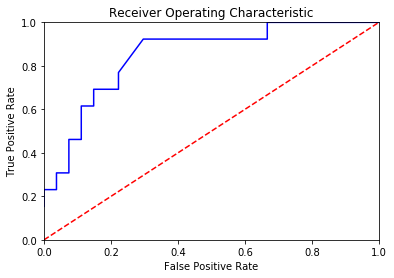

In [44]:
plot_roc(fpr,tpr)

In [45]:
metrics.auc(fpr,tpr)

0.84900284900284906